# Plotting ToF vs. V$_{rf}$

Hi! Welcome :) Portions of this code were originally created by Marilena Lykiardopoulou and the rest was created and commented by Annabelle Czihaly. 

The goal of this script is to create a plot of ToF vs. V$_{rf}$.

Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import optimize

#### define tof_resonance function

In [2]:
def tof_res(df): 

    ToF = []
    counts = []
    sigma = []
    vrf = []
    
    for i in range(0, max(df['x_step_idx'])+1): # for i in range 0 to the max value in x_step_idx col (inclusive)
        
        df_i = df.loc[df['x_step_idx']==i] # df_i is a new dataframe that has all rows where the value in df['x_step_idx'] is equal to i
        
        ToF.append(np.average(df_i['tof'])) 
        sigma.append(np.std(df_i['tof']))
        counts.append(len(df_i['tof']))
        
        # turn df_i['step_value_ppg'] into a list
        # from this list, remove all [] brackets
        # make all values floats
        # get the average of them 
        
        vrf.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].str.split(',').str[0]]))
        
    return ToF, sigma, counts, vrf

#### define sine function

In [3]:
def sine(x, a, b, c, d):
    return a * np.sin(b * (x+d)) + c

#### load data, do a tof cut, and use the tof_res function on data

In [4]:
df = pd.read_csv("run45387.csv") 
df = df.loc[df['tof']<=130] #apply tof cut to dateframe

ToF, sigma, counts, vrf = tof_res(df)

#### make a guess for amplitude, frequency, y offset, and phase. Then, fit a curve and print the fit parameters

In [5]:
vrf = np.array(vrf)

# guess = [amplitude, frequency, y offset, phase]
guess = [-1, 150, 90, 2]
params, params_covariance = optimize.curve_fit(sine, vrf, ToF, guess)

print(params)

[ -0.94604311 150.96753429  88.73696137   1.98539385]


#### plot data, guess, and fit 

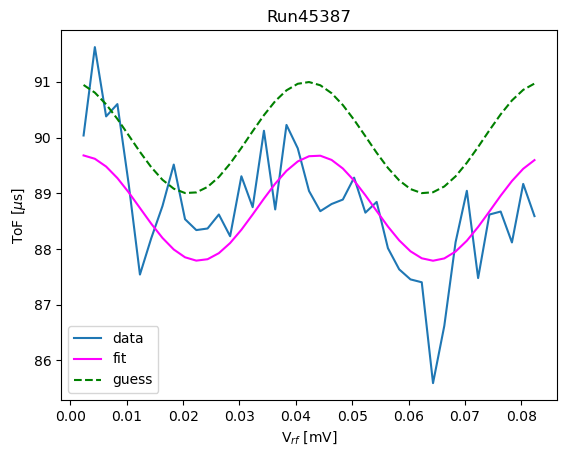

In [7]:
plt.plot(vrf, ToF, label='data')

# note: the data isn't sinusoidal but the fit helps us determine the v_rf of the lowest ToF(s)
plt.plot(vrf, sine(vrf, params[0], params[1], params[2], params[3]), label='fit', color='fuchsia')
plt.plot(vrf, sine(vrf, guess[0], guess[1], guess[2], guess[3]), label='guess', color='green', linestyle='dashed')

plt.title('Run45387')
plt.xlabel('V$_{rf}$ [mV]')
plt.ylabel('ToF [$\mu$s]')

plt.legend(loc='best')
#plt.savefig('run45387.png', dpi = 200)